In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

In [3]:
# Import daa
feature_path = "../data/train_features.csv"
label_path = "../data/train_labels.csv"

X = pd.read_csv(feature_path)
y = pd.read_csv(label_path)

FileNotFoundError: [Errno 2] No such file or directory: '../data/train_features.csv'

In [4]:
# Compute proportion of missing values
tot_rows = X.shape[0]
prop_missing_vals = {}


for col_name in X.columns:
    non_missing_vals = np.sum(X.loc[:, col_name].isna())
    prop_missing_vals[col_name] = 1 - non_missing_vals / tot_rows

NameError: name 'X' is not defined

In [6]:
def sort_dict(d: dict) -> dict:
    return {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
    
prop_missing_vals = sort_dict(prop_missing_vals)    
    
for key, val in prop_missing_vals.items():
    print(key, val)

Bilirubin_direct 0.0031543388611038337
Fibrinogen 0.01093708870755461
TroponinI 0.01656576292006673
Bilirubin_total 0.023365798017021988
Alkalinephos 0.025041677634465187
AST 0.02527419496358696
EtCO2 0.04291918926033167
PTT 0.045182942879705146
Lactate 0.04718785645345269
Phosphate 0.05084671404755636
HCO3 0.05509783276300784
SaO2 0.05709397209792055
Chloride 0.06105554093182419
Magnesium 0.07687549355093448
Creatinine 0.07805562867421256
Calcium 0.07822233921207333
Platelets 0.07912169869263841
WBC 0.08371939984206367
BaseExcess 0.08724664385364567
BUN 0.0882030358866368
PaCO2 0.09231815390014919
Hgb 0.09781082741072211
pH 0.10987979292796346
FiO2 0.11670615074142321
Hct 0.11975519873650964
Potassium 0.1245634816179696
Glucose 0.20635254891638155
Temp 0.35586119154163376
ABPd 0.6686759673598315
RRate 0.8238352197946828
ABPs 0.8407914363428972
SpO2 0.8563306133192945
ABPm 0.8593884355532158
Heartrate 0.8779854347635343
pid 1.0
Time 1.0
Age 1.0


Text(0, 0.5, 'Proportion of values missing')

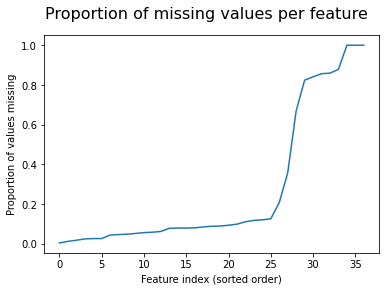

In [7]:
props = list(prop_missing_vals.values())
plt.plot(props)
plt.suptitle("Proportion of missing values per feature", size=16)
plt.xlabel("Feature index (sorted order)")
plt.ylabel("Proportion of values missing")

In [10]:
# Covert to time series df
def to_timeseries(df: pd.DataFrame, colnames: List[str], time_steps: int, unique_id: str):
    """Coverts dataframe into time series version with unique identifier"""
    X_new = pd.DataFrame()
    
    unique_ids = df.loc[:, unique_id].unique()
    print("unique_ids:", len(unique_ids))

    #for id_ in unique_ids:
    patient_rows = df[df[unique_id] == unique_ids[0]]
    
    #for index, row in patient_rows.iterrows():
    #    X_new[index, ""]
     
to_timeseries(X, X.columns, 12, "pid")

unique_ids: 18995


In [70]:
#### After ts

ts_path = "../data/data_p.csv"
missing_val_path = "../data/data_miss.csv"

X_ts = pd.read_csv(ts_path)
missing_idx = pd.read_csv(missing_val_path)

In [80]:
missing_idx

,index_x,missRate-0,missRate-1,missRate-2,missRate-3,missRate-4,missRate-5,missRate-6,missRate-7,missRate-8,missRate-9,missRate-10,missRate-11
0,Time-0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Age-0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,EtCO2-0,0.993367,0.950513,0.950197,0.950197,0.951250,0.951882,0.954356,0.955830,0.956199,0.956673,0.956831,0.957673
3,PTT-0,0.938036,0.903238,0.951566,0.961200,0.963675,0.962569,0.961306,0.961885,0.961358,0.964675,0.961779,0.966518
4,BUN-0,0.917347,0.835641,0.912398,0.930982,0.931719,0.925928,0.921611,0.915662,0.912714,0.916715,0.907660,0.913188
5,Lactate-0,0.966781,0.921769,0.937773,0.939563,0.947670,0.950724,0.955778,0.956252,0.959989,0.962727,0.966781,0.967939
6,Temp-0,0.829166,0.660858,0.633851,0.614583,0.612424,0.618636,0.626639,0.623796,0.620637,0.625165,0.632114,0.631798
7,Hgb-0,0.906923,0.830903,0.902659,0.917452,0.917715,0.912029,0.909608,0.905870,0.905554,0.908555,0.900605,0.908397
8,HCO3-0,0.923138,0.897447,0.950882,0.961148,0.958463,0.955041,0.952251,0.948829,0.947407,0.949829,0.945143,0.949250
9,BaseExcess-0,0.917452,0.863490,0.894393,0.893024,0.898342,0.908292,0.913714,0.920716,0.930403,0.933930,0.937194,0.942090


In [37]:
X_ts

,pid,Time-0,Age-0,EtCO2-0,PTT-0,BUN-0,Lactate-0,Temp-0,Hgb-0,HCO3-0,...,Alkalinephos-11,SpO2-11,Bilirubin_direct-11,Chloride-11,Hct-11,Heartrate-11,Bilirubin_total-11,TroponinI-11,ABPs-11,pH-11
0,1,3,34.0,NaN,NaN,12.0,NaN,36.0,8.7,24.0,...,NaN,100.0,NaN,NaN,22.2,69.0,NaN,NaN,102.0,NaN
1,2,1,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,94.0,NaN,NaN,NaN,59.0,NaN,NaN,136.0,NaN
2,4,1,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,97.0,NaN,NaN,NaN,72.0,NaN,NaN,96.0,NaN
3,6,2,66.0,NaN,53.8,32.0,NaN,35.0,10.6,20.0,...,NaN,98.0,NaN,NaN,27.4,90.0,NaN,NaN,98.0,NaN
4,8,1,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,98.0,NaN,NaN,NaN,81.0,NaN,NaN,204.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18990,31653,1,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,93.0,NaN,NaN,NaN,148.0,NaN,NaN,NaN,NaN
18991,31654,1,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,97.0,NaN,NaN,NaN,90.0,NaN,NaN,153.0,NaN
18992,31656,1,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18993,31657,1,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,99.0,NaN,NaN,NaN,63.0,NaN,NaN,106.0,NaN


In [6]:
# Hyperparameter for deciding when to do univariate (simple) vs multivariate imputation
missing_val_threshold = 0.7

In [5]:
# OBS: Only run this cell once! 
# Remove trailing "-0" from feature names
missing_idx["index_x"] = [name[:-2] for name in missing_idx["index_x"]]
missing_idx

,index_x,missRate-0,missRate-1,missRate-2,missRate-3,missRate-4,missRate-5,missRate-6,missRate-7,missRate-8,missRate-9,missRate-10,missRate-11
0,Time,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Age,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,EtCO2,0.993367,0.950513,0.950197,0.950197,0.951250,0.951882,0.954356,0.955830,0.956199,0.956673,0.956831,0.957673
3,PTT,0.938036,0.903238,0.951566,0.961200,0.963675,0.962569,0.961306,0.961885,0.961358,0.964675,0.961779,0.966518
4,BUN,0.917347,0.835641,0.912398,0.930982,0.931719,0.925928,0.921611,0.915662,0.912714,0.916715,0.907660,0.913188
5,Lactate,0.966781,0.921769,0.937773,0.939563,0.947670,0.950724,0.955778,0.956252,0.959989,0.962727,0.966781,0.967939
6,Temp,0.829166,0.660858,0.633851,0.614583,0.612424,0.618636,0.626639,0.623796,0.620637,0.625165,0.632114,0.631798
7,Hgb,0.906923,0.830903,0.902659,0.917452,0.917715,0.912029,0.909608,0.905870,0.905554,0.908555,0.900605,0.908397
8,HCO3,0.923138,0.897447,0.950882,0.961148,0.958463,0.955041,0.952251,0.948829,0.947407,0.949829,0.945143,0.949250
9,BaseExcess,0.917452,0.863490,0.894393,0.893024,0.898342,0.908292,0.913714,0.920716,0.930403,0.933930,0.937194,0.942090


In [7]:
# See which features multivariate imputation should be performed (excluding time and age features)  
perform_multivariate = missing_idx.iloc[2:, 1:] > missing_val_threshold

perform_multivariate

,missRate-0,missRate-1,missRate-2,missRate-3,missRate-4,missRate-5,missRate-6,missRate-7,missRate-8,missRate-9,missRate-10,missRate-11
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True
6,True,False,False,False,False,False,False,False,False,False,False,False
7,True,True,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,True,True
10,True,False,False,False,False,False,False,False,False,False,False,False
11,True,True,True,True,True,True,True,True,True,True,True,True


In [88]:
# Todo: iterate over perform_multivariate
feature_idx = 6 # false: should perform univariate imputation
time = 1

general_feature_name = missing_idx["index_x"][feature_idx]
feature_t = X_ts[f"{general_feature_name}-{time}"]
feature_t

0        36.0
1        36.0
2         NaN
3        35.0
4        36.0
         ... 
18990     NaN
18991     NaN
18992     NaN
18993     NaN
18994     NaN
Name: Temp-1, Length: 18995, dtype: float64

In [96]:
# Simple imputer example
from sklearn.impute import SimpleImputer

uni_imputer = SimpleImputer(strategy="mean")

# Here we see the imputed data vector for this specific column!
imputed_feature_t = uni_imputer.fit_transform(feature_t.values.reshape(-1, 1))
imputed_feature_t

array([[36.        ],
       [36.        ],
       [36.36712201],
       ...,
       [36.36712201],
       [36.36712201],
       [36.36712201]])

In [99]:
# v1, don't run

# Let's try multivariate imputer, on first feature we need to use it on 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

random_state = 0

# multi_imputer = IterativeImputer(max_iter=1, random_state=random_state).fit(X_ts)

/Users/simondanielsson/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [105]:
column_name = "EtCO2-0"
feature = X_ts[column_name]

imputed_feature = multi_imputer.transform(X_ts)
imputed_feature

array([[1.00000000e+00, 3.00000000e+00, 3.40000000e+01, ...,
        1.00099696e+01, 1.02000000e+02, 7.38353704e+00],
       [2.00000000e+00, 1.00000000e+00, 8.60000000e+01, ...,
        9.94391097e+00, 1.36000000e+02, 7.38353908e+00],
       [4.00000000e+00, 1.00000000e+00, 6.60000000e+01, ...,
        8.88748614e+00, 9.60000000e+01, 7.38355518e+00],
       ...,
       [3.16560000e+04, 1.00000000e+00, 4.40000000e+01, ...,
        9.46931470e+00, 1.05453344e+02, 7.38355180e+00],
       [3.16570000e+04, 1.00000000e+00, 7.00000000e+01, ...,
        9.70774563e+00, 1.06000000e+02, 7.38353736e+00],
       [3.16580000e+04, 1.00000000e+00, 6.00000000e+01, ...,
        1.04247590e+01, 1.35000000e+02, 7.38354032e+00]])

In [152]:
## v2, simple + multivariate 
from sklearn.impute import SimpleImputer

def single_impute(df: pd.DataFrame, feature_name: list) -> pd.DataFrame:
    imputer = SimpleImputer(strategy="mean")
    
    col = df.loc[:, feature_name]
    df.loc[:, feature_name] = imputer.fit_transform(col.values.reshape(-1, 1))
    
    return df
    
    
def perform_single_impute(df: pd.DataFrame, features_to_impute: list) -> pd.DataFrame:
    df_ts = df.copy()
    original_features = [name[:-2] if index != 0 else name for index, name in enumerate(df_ts)]
    original_features = original_features[:37]

    # Simple impute over each time series column (i.e. across different patients)
    tot = 0
    for feature_name in features_to_impute:
        df_ts = single_impute(df_ts, feature_name)
            
    return df_ts

def prop_missing(df: pd.DataFrame) -> dict:
    prop_missing_vals = {}
    tot_rows = df.shape[0]
    
    for col_name in df.columns:
        missing_vals = np.sum(df.loc[:, col_name].isna())
        prop_missing_vals[col_name] = missing_vals / df.shape[0]
        
    return prop_missing_vals

def find_impute_features(df: pd.DataFrame, missing_threshold: float) -> list:
    missing = prop_missing(df)
    features_to_impute = []
    
    for feature, val in missing.items():
        if val < missing_threshold:
            features_to_impute += [feature]
            
    return features_to_impute
            
            
features_to_impute = find_impute_features(X_ts, 0.7)
X_ts_new = perform_single_impute(X_ts, features_to_impute)            

In [132]:
def print_sorted_dict(d: dict):
    def sort_dict(d: dict) -> dict:
        return {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}

    for key, val in sort_dict(d).items():
        print(key, val)

In [113]:
#print_sorted_dict(prop_missing(X_ts))
#print_sorted_dict(prop_missing(X_ts_new))

,pid,Time-0,Age-0,EtCO2-0,PTT-0,BUN-0,Lactate-0,Temp-0,Hgb-0,HCO3-0,...,Alkalinephos-11,SpO2-11,Bilirubin_direct-11,Chloride-11,Hct-11,Heartrate-11,Bilirubin_total-11,TroponinI-11,ABPs-11,pH-11
0,1,3,34.0,NaN,NaN,12.0,2.978574,36.0,8.7,24.0,...,NaN,100.0,NaN,NaN,22.2,69.0,NaN,NaN,102.0,NaN
1,2,1,86.0,NaN,NaN,NaN,2.978574,NaN,NaN,NaN,...,NaN,94.0,NaN,NaN,NaN,59.0,NaN,NaN,136.0,NaN
2,4,1,66.0,NaN,NaN,NaN,2.978574,NaN,NaN,NaN,...,NaN,97.0,NaN,NaN,NaN,72.0,NaN,NaN,96.0,NaN
3,6,2,66.0,NaN,53.8,32.0,2.978574,35.0,10.6,20.0,...,NaN,98.0,NaN,NaN,27.4,90.0,NaN,NaN,98.0,NaN
4,8,1,42.0,NaN,NaN,NaN,2.978574,NaN,NaN,NaN,...,NaN,98.0,NaN,NaN,NaN,81.0,NaN,NaN,204.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18990,31653,1,52.0,NaN,NaN,NaN,2.978574,NaN,NaN,NaN,...,NaN,93.0,NaN,NaN,NaN,148.0,NaN,NaN,NaN,NaN
18991,31654,1,66.0,NaN,NaN,NaN,2.978574,NaN,NaN,NaN,...,NaN,97.0,NaN,NaN,NaN,90.0,NaN,NaN,153.0,NaN
18992,31656,1,44.0,NaN,NaN,NaN,2.978574,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18993,31657,1,70.0,NaN,NaN,NaN,2.978574,NaN,NaN,NaN,...,NaN,99.0,NaN,NaN,NaN,63.0,NaN,NaN,106.0,NaN


In [153]:
def cols_without_missing(df: pd.DataFrame) -> None:
    missing_dict = prop_missing(df)
    print("# columns without missing vals:", (pd.DataFrame(list(missing_dict.values())) == 1.0).sum().values[0])

print("number of columns to single impute", (perform_multivariate == False).sum().sum())
cols_without_missing(X_ts)
cols_without_missing(X_ts_new)

number of columns to single impute 77
# columns without missing vals: 0
# columns without missing vals: 0
